In [2]:
#Useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

#Librosa imports for manipulating audio files
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
general_path = '../Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['hiphop', 'classical', 'blues', 'metal', 'jazz', 'country', 'pop', 'rock', 'disco', 'reggae']


# Explore Audio Data

I will use librosa to understand and examine the audio files.

In [4]:
y, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')
print('y:',y,'\n')
print('y shape:',np.shape(y),'\n')
print('Sample Rate (KHz): ', sr, '\n')

print('Check Length of Audio', 661794/sr)


y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz):  22050 

Check Length of Audio 30.013333333333332


In [5]:
#Trimming the leading and trailing silence from an audio signal 
# (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)
print('Audio File: ',audio_file,'\n')
print('Audio File Shape: ', np.shape(audio_file))


Audio File:  [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File Shape:  (661794,)


#### 2D Representation: Sound Waves

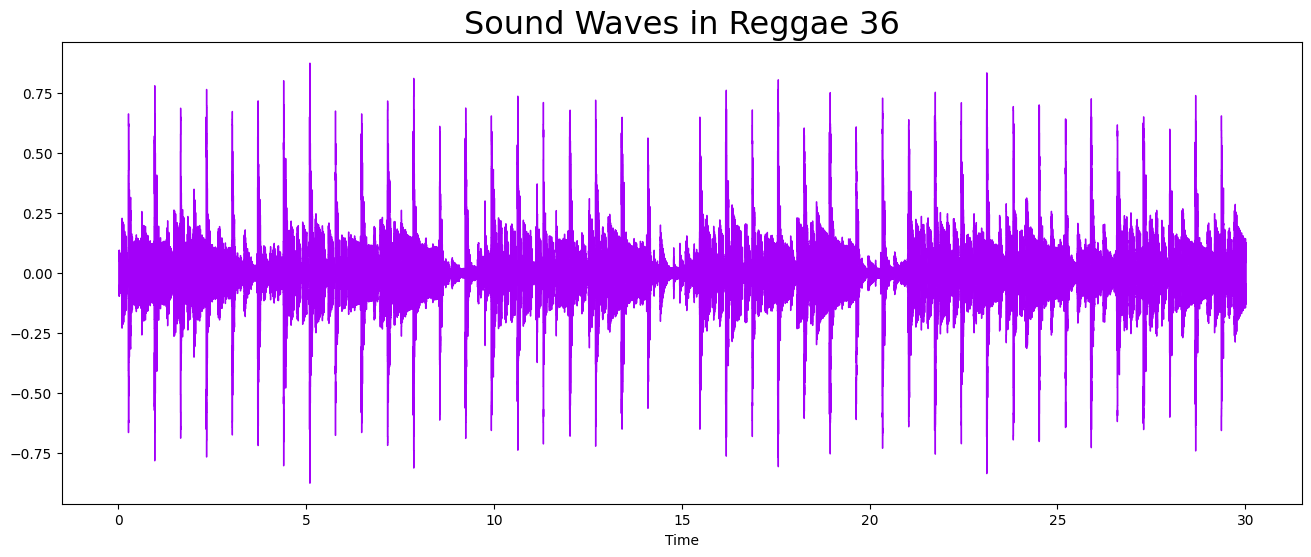

In [6]:
plt.figure(figsize = (16,6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae 36", fontsize =23);

#### Fourier Transform
* Function that gets signal in time domain as input, and outputs its decomposition into frequencies.
* Transform both the y-axis (frequency) to log scale, and the "color" axis (amplitude) to Decibles, which is approx. the log scale of amplitudes.

In [7]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns

# Short-time Fourier Transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


 ...]

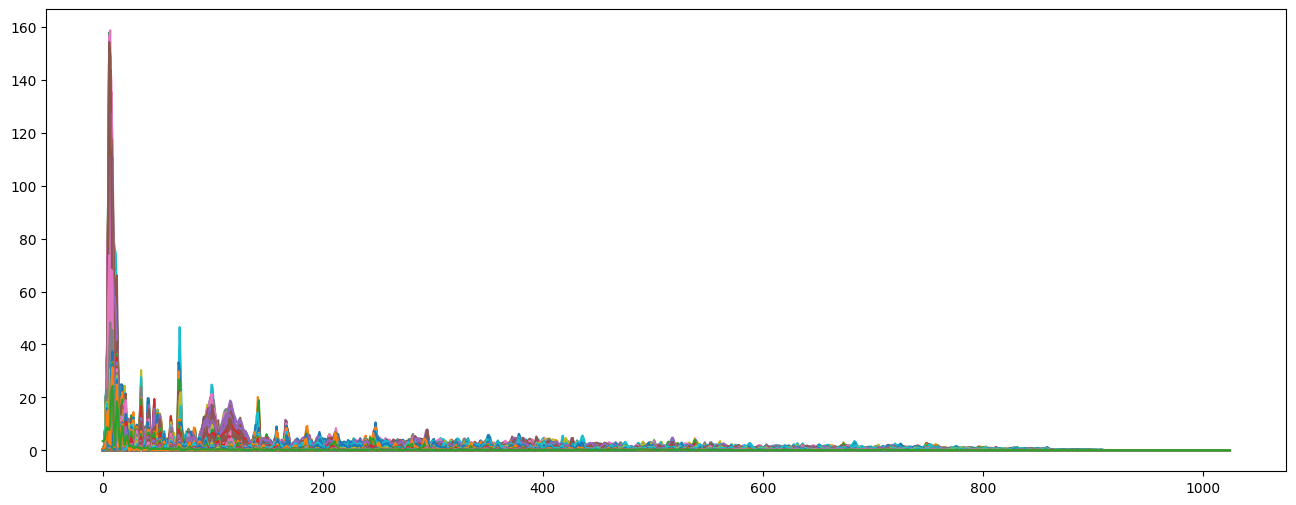

In [8]:
plt.figure(figsize = (16, 6))
plt.plot(D)

#### The Spectrogram
* What is a spectrogram? A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies in time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams.
* Here we convert the frequency axis to a logarithmic one.

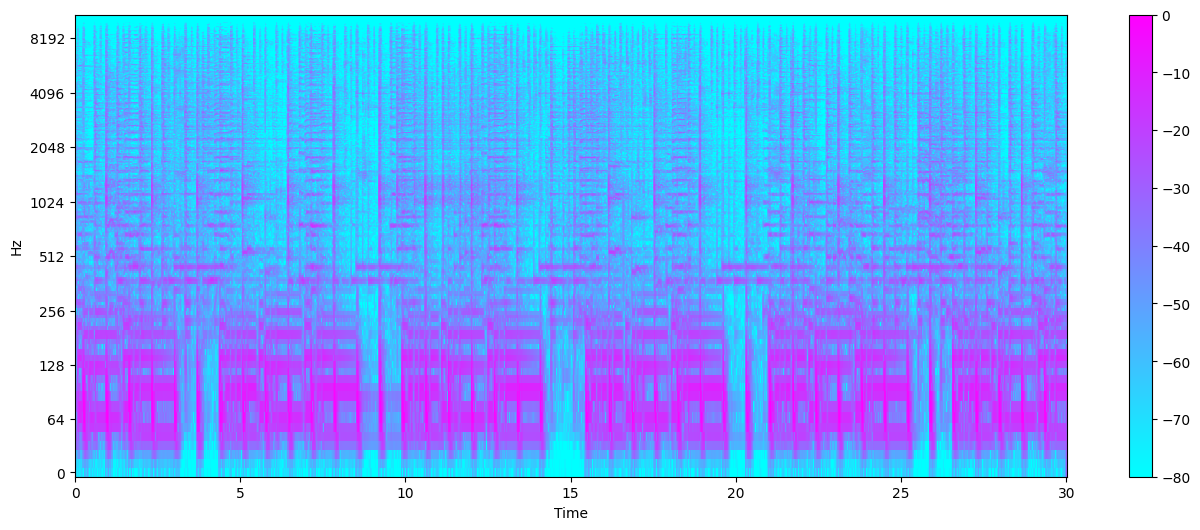

In [9]:
# Here we are converting the amplitude spectrogram from 
# above to a Decibles-scaled spectogram
DB = librosa.amplitude_to_db(D, ref = np.max)

#Creating the spectrogram 
plt.figure(figsize =(16,6))
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()

#### Mel Spectrogram
* The Mel Scale, mathmatically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectogram is a normal Spectogram, but with a Mel Scale on the y-axis.


Text(0.5, 1.0, 'Metal Mel Spectogram')

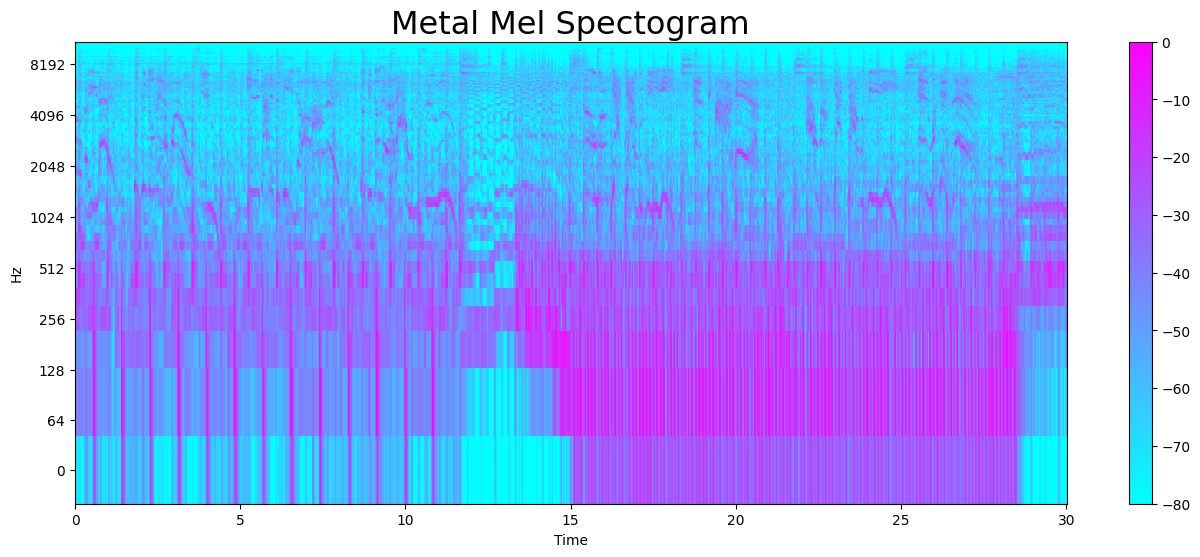

In [10]:
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)

S= librosa.feature.melspectrogram(y, sr = sr)
S_DB =librosa.amplitude_to_db(S, ref = np.max)
plt.figure(figsize = (16,6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis ='time', y_axis='log', cmap='cool')

plt.colorbar()
plt.title("Metal Mel Spectogram", fontsize=23)

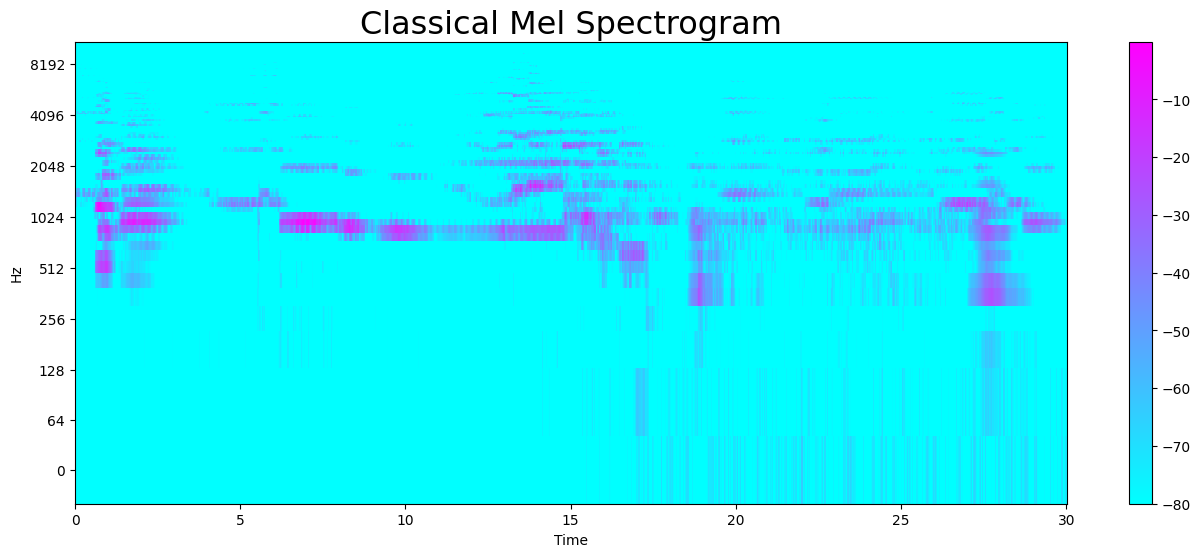

In [11]:
y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

#### Zero Crossing Rate
* The rate at which the signal changes from positive to negative or back

In [12]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad = False)
print(sum(zero_crossings))

39232


#### Harmonics and Perceptrual
* Harmonics are characteristics that human ears can't distinguish (represents the sound color)
* Perceptrual understanding shock wave represents the sound rhythm and emotion

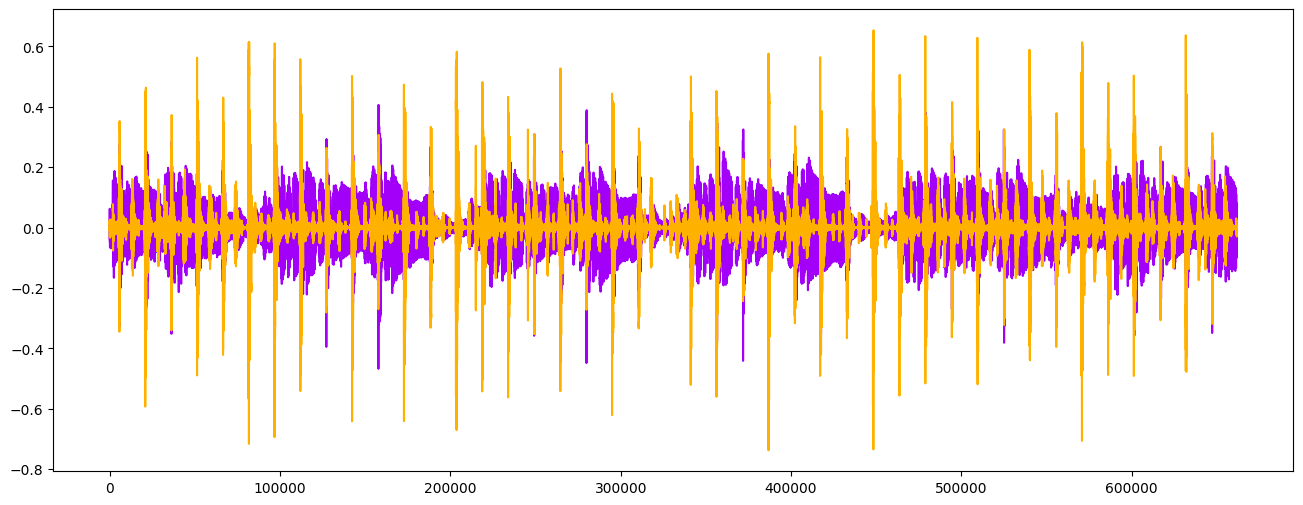

In [13]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize=(16,6))
plt.plot(y_harm, color = '#A300F9')
plt.plot(y_perc, color = '#FFB100')

#### Tempo BMP (Beats per minute)
* Dynamic Programming beat tracker

In [14]:
tempo, _ = librosa.beat.beat_track(y, sr=sr)
tempo

107.666015625

#### Spectral Centroid
* Indicates where the "centre of mass" for a sound is located and is calculated as the weighted mean of the frequencies present in the sound


In [18]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids: ', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame count to time (seconds)
t= librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:',t)


# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids:  [1758.29476432 1946.74243678 2038.8113414  ...  766.50416352 1041.07728901
 1391.05145642] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


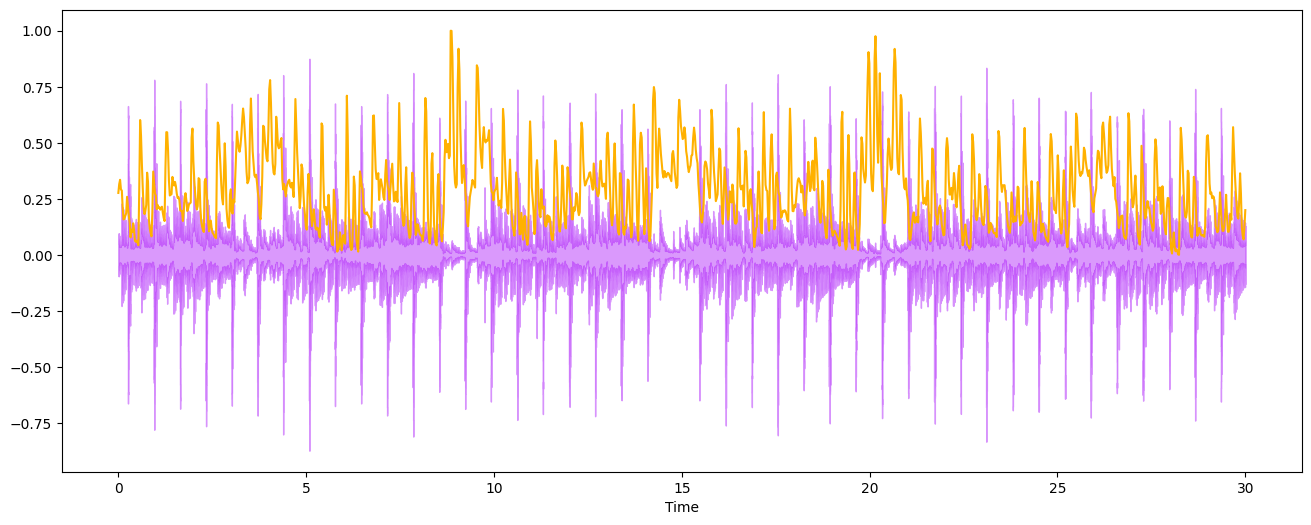

In [19]:
# Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16,6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color ='#A300F9')
plt.plot(t, normalize(spectral_centroids), color = '#FFB100')

#### Spectral Rolloff
* This is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

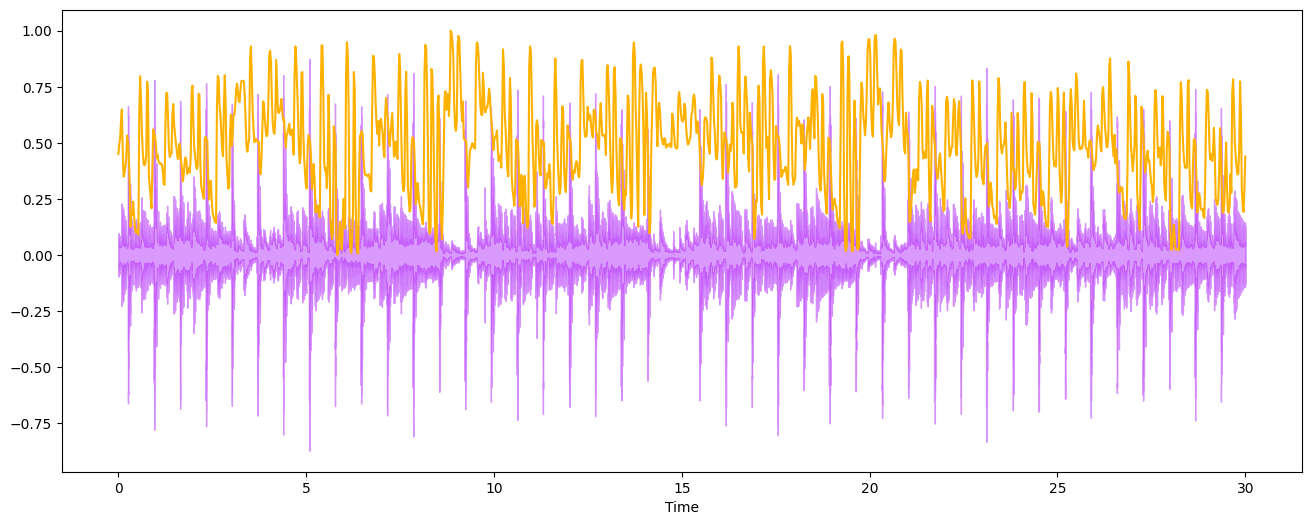

In [22]:
# Spectral RollOff Vector
spectral_rolloff= librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]

# The Plot
plt.figure(figsize=(16,6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color='#A300F9')
plt.plot(t, normalize(spectral_rolloff), color ='#FFB100')

##### Mel-Frequency Cepstral Coefficients:
* The Mel frequency cepstral coefficients (MFCCSs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of spectral envelope. It models the characteristics of the human voice.

mfccs shape: (20, 1293)


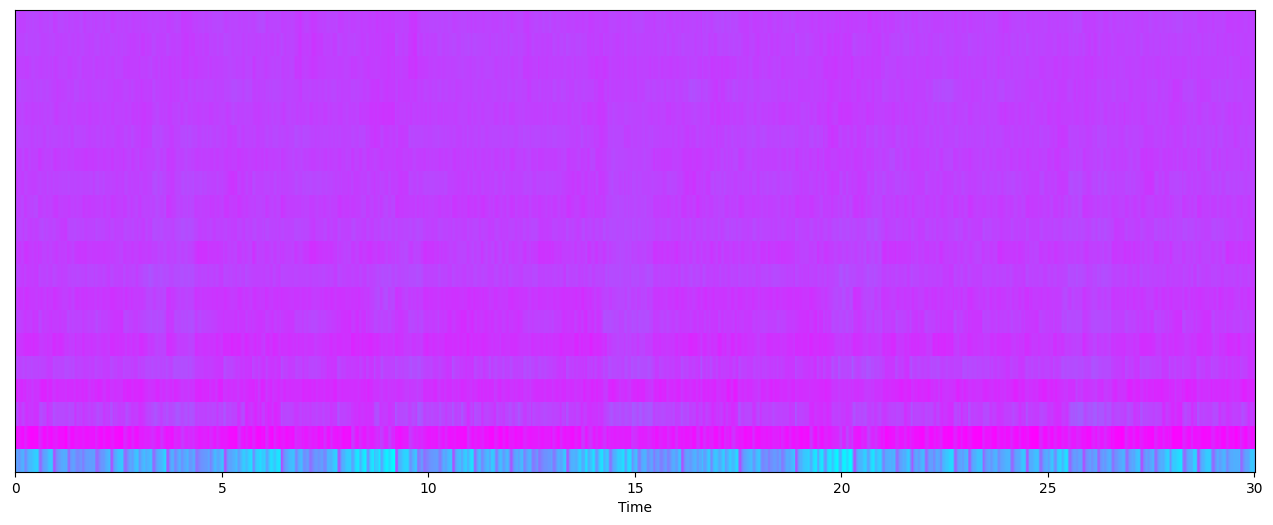

In [31]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Data Needs to be Scaled:

Mean: -2.1389448e-09 

Var: 1.0000001


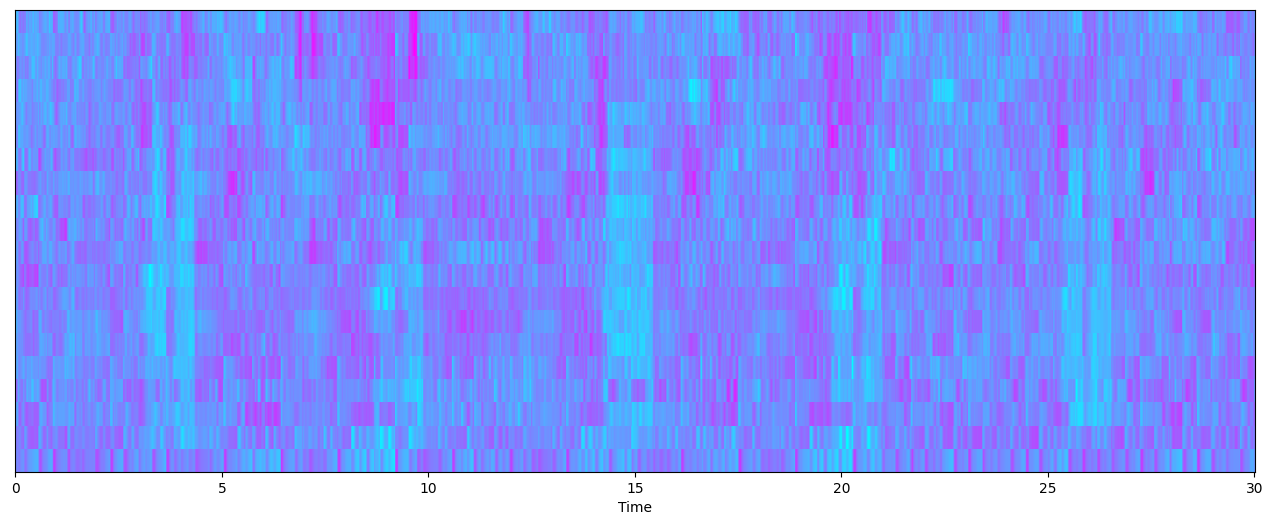

In [32]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

##### Chroma Frequencies

* Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing 12 distinct semitones (or chroma) of the musical octave.

Chromogram shape: (12, 133)


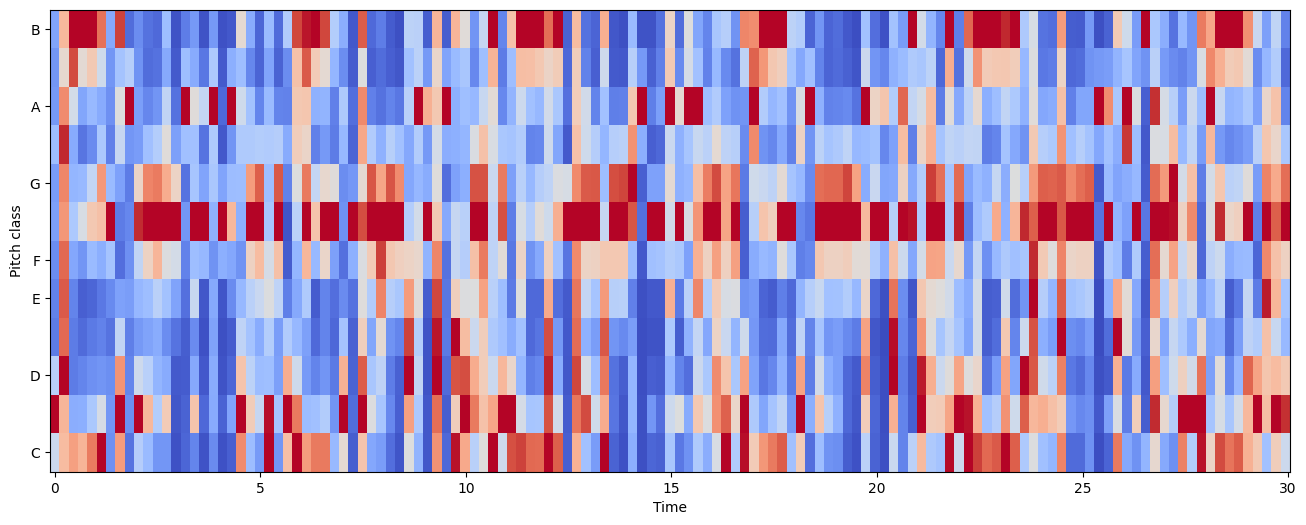

In [33]:
# Increase or decrease hop_length to
# change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

##### EDA

EDA is going to be preformed on the features_30_sec.csv. This file contains the mean and variance for each audio file for the features to be analyzed above.

In [34]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


##### Correlation Heatmap for feature means

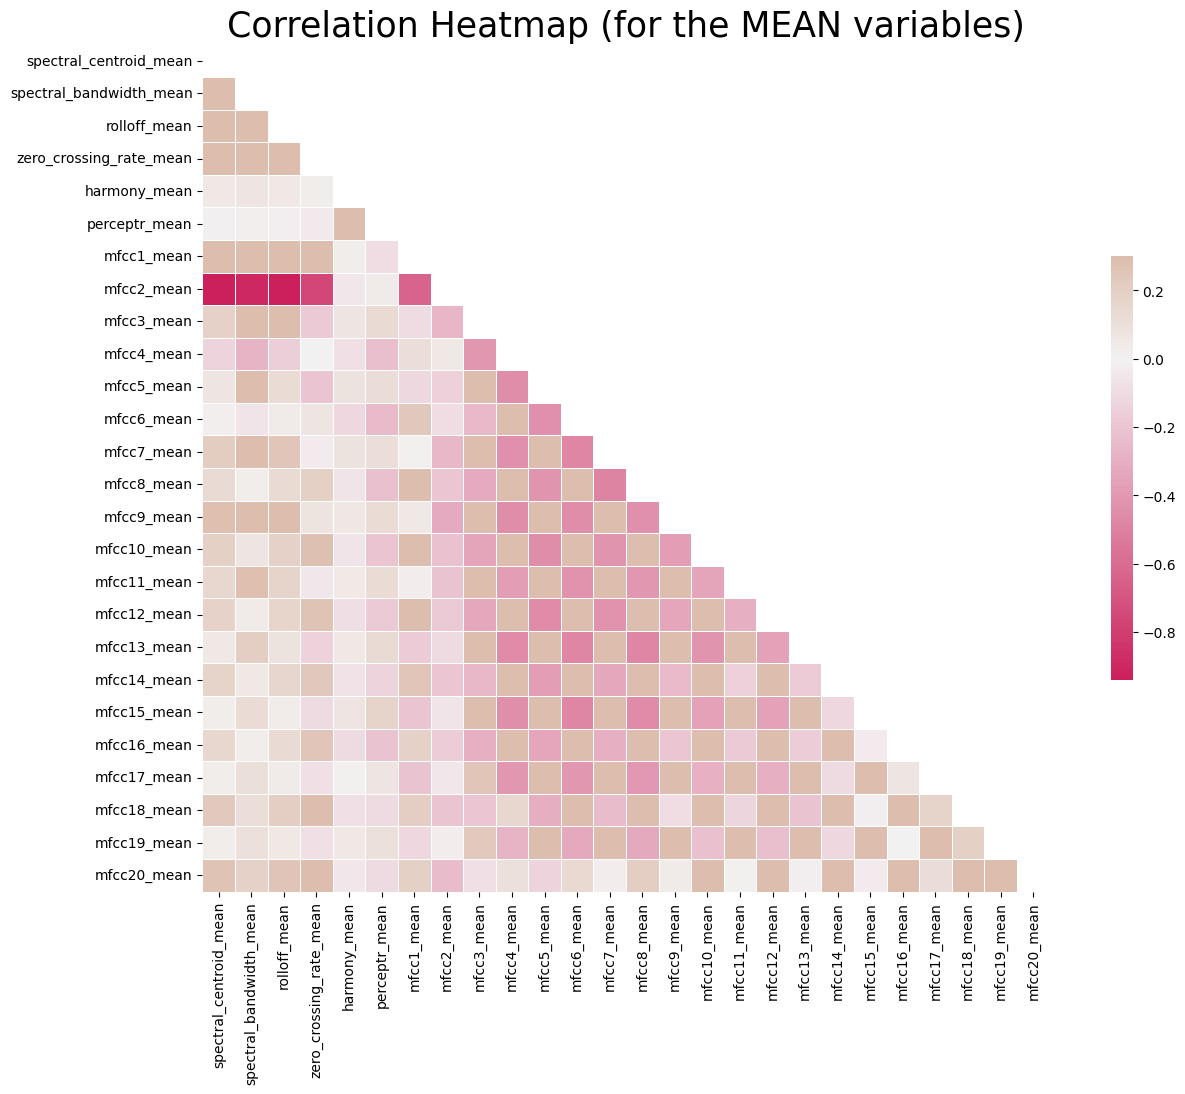

In [53]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig("Corr Heatmap.jpg")

##### Box Plot for Genres Distributions

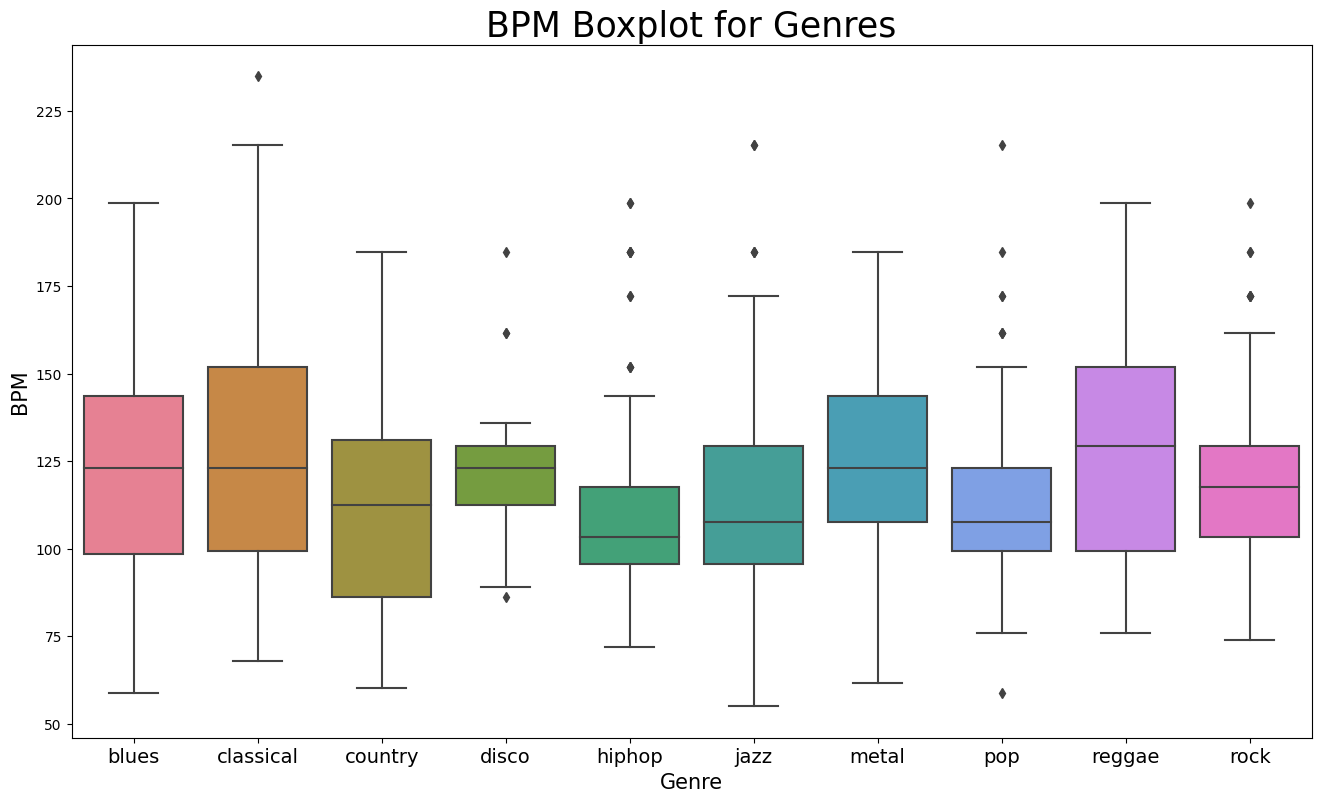

In [54]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

##### Principal Component Analysis - to visualize possible groups of genres
1. Normalization
2. PCA
3. The Scatter Plot

In [55]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.25897723, 0.20636445])

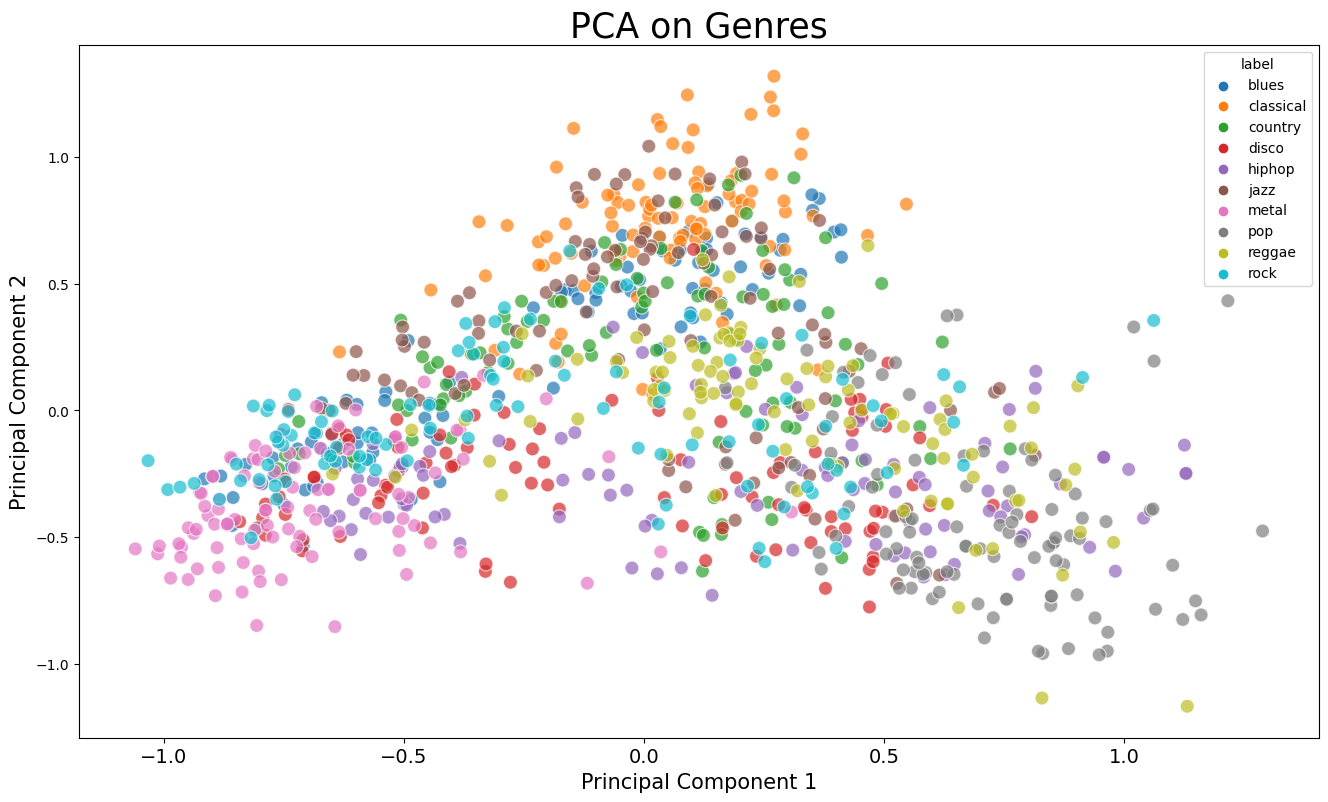

In [56]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")